In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

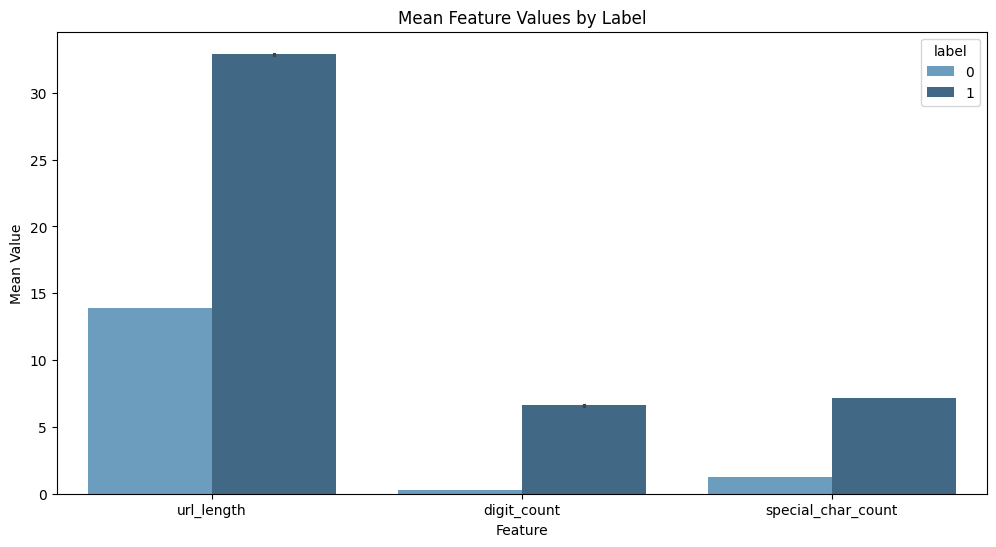

In [4]:
df = pd.read_csv("./data/extracted_features.csv")
features = ['url_length', 'digit_count', 'special_char_count']
melted_df = df.melt(id_vars=['label'], value_vars=features, var_name='feature', value_name='value')
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='feature', y='value', hue='label', palette='Blues_d')
plt.title("Mean Feature Values by Label")
plt.xlabel("Feature")
plt.ylabel("Mean Value")
plt.show()
plt.savefig("mean_feature_barplot.png")
plt.close()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load data
df = pd.read_csv("./data/extracted_features.csv")
feature_cols = [col for col in df.columns if "deep_feature" in col]
X = df[feature_cols].values

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Create DataFrame for plotting
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
tsne_df["label"] = df["label"]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="label", palette="Set1", alpha=0.5)
plt.title("t-SNE Visualization of Deep Learning Features")
plt.savefig("tsne_deep_features.png")
plt.close()

KeyboardInterrupt: 

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./data/extracted_features.csv")
feature_cols = [col for col in df.columns if "deep_feature" in col]
X = df[feature_cols].sample(n=1000, random_state=42)  # Subsample for clarity

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(X, cmap="viridis", cbar=True)
plt.title("Heatmap of Deep Learning Feature Activations")
plt.xlabel("Feature Index")
plt.ylabel("Sample Index")
plt.savefig("feature_activation_heatmap.png")
plt.close()

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model("./models/best_model_cnn_model.h5")

# Step 1: Check model summary before and after building
print("Model summary before building:")
print(model.summary())

# Step 2: Define the input shape explicitly (based on your model: (None, 47, 1))
input_shape = (47, 1)  # Shape without batch size (batch_size is None in Keras)

# Step 3: Build the model explicitly if it supports .build()
# Note: Some models loaded from .h5 might not need this, but it ensures the graph is ready
try:
    model.build((None,) + input_shape)  # Add None for batch dimension
    print("Model built successfully with input shape:", (None,) + input_shape)
except ValueError:
    print("Model.build() not applicable, proceeding with dummy input.")

# Step 4: Call the model with dummy input to ensure the graph is initialized
dummy_input = np.zeros((1, 47, 1))  # Batch of 1, 47 timesteps, 1 channel
model(dummy_input)  # This should define the input/output tensors
print("Model called with dummy input. Input shape:", model.input_shape)

# Step 5: Verify the model is ready
print("Model summary after building/calling:")
print(model.summary())

# Step 6: Create a submodel to extract activations from the 'conv1d' layer
layer_name = "conv1d"  # Matches your model summary
activation_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Step 7: Prepare a sample input (preprocessed URL)
def preprocess_url(url, max_length=47):
    chars = [ord(c) if c.isascii() else 0 for c in url]
    if len(chars) > max_length:
        chars = chars[:max_length]
    else:
        chars = chars + [0] * (max_length - len(chars))
    return np.array(chars).reshape(1, max_length, 1)  # Shape: (1, 47, 1)

# Example URL
sample_url = "http://example.com/phishing"
X_sample = preprocess_url(sample_url)

# Step 8: Get activations
activations = activation_model.predict(X_sample)  # Shape: (1, 45, 64)

# Step 9: Plot activations for the first few filters
plt.figure(figsize=(12, 8))
for i in range(min(5, activations.shape[2])):  # Plot first 5 filters
    plt.subplot(5, 1, i + 1)
    plt.plot(activations[0, :, i])
    plt.title(f"Filter {i + 1} Activations")
    plt.xlabel("Sequence Position")
    plt.ylabel("Activation Value")
plt.tight_layout()
plt.savefig("conv1d_multi_filter_activations.png")
plt.close()

print("Plot saved as 'conv1d_multi_filter_activations.png'")

Model summary before building:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 45, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 22, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        22,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,091 (113.64 KB)

 Trainable params: 29,089 (113.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None
Model.build() not applicable, proceeding with dummy input.
Model called with dummy input. Input shape: (None, 45, 1)
Model summary after building/calling:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 45, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 22, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        22,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,091 (113.64 KB)

 Trainable params: 29,089 (113.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/extracted_features.csv")
feature_cols = [col for col in df.columns if col not in ['url', 'label']]
correlation_matrix = df[feature_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of URL Features")
plt.savefig("feature_correlation_heatmap.png")
plt.close()

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# Load the data
df = pd.read_csv("./data/legitimate_urls.csv")

# Extract domain from URLs
df['domain'] = df['url'].apply(lambda x: urlparse(x).netloc)

# Create the count plot for top 10 domains
plt.figure(figsize=(14, 6))  # Increased width
sns.countplot(data=df, x='domain', order=df['domain'].value_counts().index[:10])
plt.title("Top 10 Domains by Scraped URL Count")
plt.xlabel("Domain")
plt.ylabel("Number of URLs")
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts spacing automatically
plt.savefig("scraped_urls_count.png")
plt.close()

print("Plot saved as 'scraped_urls_count.png'")

Plot saved as 'scraped_urls_count.png'
